In [8]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("D:\\YAO\\GLM\\Analysis_bank_4000sp.csv")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


In [29]:
#描述性統計
print(data['job'].describe())
print(set(data['job']))

count       4119
unique        12
top       admin.
freq        1012
Name: job, dtype: object
{'student', 'entrepreneur', 'retired', 'unknown', 'admin.', 'self-employed', 'management', 'unemployed', 'services', 'housemaid', 'technician', 'blue-collar'}


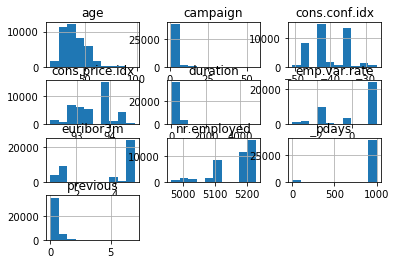

In [8]:
df.hist()
pl.show()

In [42]:
#對DATA增加intercept
data['intercept'] = 1.0
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,intercept
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1.0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,1.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1.0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1.0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1.0


In [43]:
data_conti = ['duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data1 = data[['intercept','age','y']]
data1.head()

,intercept,age,y
0,1.0,30,0
1,1.0,39,0
2,1.0,25,0
3,1.0,38,0
4,1.0,47,0


In [44]:
train_cols = data1.columns[0:2]
logit = sm.Logit(data1['y'], data1[train_cols])

In [64]:
# fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.343689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4117
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Apr 2017   Pseudo R-squ.:                0.005107
Time:                        13:10:22   Log-Likelihood:                -1415.7
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                 0.0001377
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept     -2.8270      0.199    -14.193      0.000        -3.217    -2.437
age            0.0179      0.

In [300]:
#找出coef
coef_pd = pd.DataFrame(result.params)
X_name = coef_pd.index[1] #變數名稱
#result.fittedvalues 這是model帶入後後的值
#result.predict() 期望機率(死亡機率)
#result.conf_int() 新賴區間
coef = list(result.params)[1] #找出coef
cov = result.cov_params()  #找出std err
stderr = np.matrix(cov)[1,1] #找出std err
z = list(result.tvalues)[1] #找出z值
p = list(result.pvalues)[1] #找出P>|z|
ci_95 = list(np.array(result.conf_int())[1])  #找出 [95.0% Conf. Int.]
print("==============================================================================")#14 7 11 
print("                 coef    std err          z      P>|z|      [95.0% Conf. Int.]")
print("------------------------------------------------------------------------------")
print("%-14s%7.5f%11.5f%11.3f%11.5f%14.5f - %6.5f"%(X_name,coef,stderr,z,p,ci_95[0],ci_95[1]))
print("==============================================================================")

                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
age           0.01789    0.00002      3.863    0.00011       0.00881 - 0.02696


In [54]:
train_cols = df.columns[10:12]
logit = sm.Logit(df['outcome'], df[ls])

In [279]:
#deviance
exp = result.predict() 
obs = np.array(data['y'])
xxx = obs/exp
xxxx = list(xxx)
yyyy = []
for i in range(len(xxxx)):
    if xxxx[i]!=0:
        yyyy.append(xxxx[i])
obs_exp = np.array(yyyy)
sum(obs_exp)*2


8297.0022021273016

In [ ]:
#for dummy variable


In [60]:
np.exp(-0.1425)

0.86718755429225491